In [209]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# for regression problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [210]:
data = pd.read_csv('H2HBABBA3076.csv')
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,06-05-2019 00:00,2019,1929172144,18-04-2019,20190418,20190418,20190503,USD,RV,1,NaN,2460.06,20190418,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,19-02-2019 00:00,2019,1928725064,03-02-2019,20190202,20190203,20190218,USD,RV,1,NaN,665.51,20190203,NAA8,1.928725e+09,0
2,U001,200706844,WINC,21-02-2020 00:00,2020,1930488176,06-02-2020,20200206,20200206,20200221,USD,RV,1,NaN,48943.27,20200206,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,23-01-2019 00:00,2019,1928606586,12-01-2019,20190110,20190112,20190127,USD,RV,1,NaN,65944.74,20190112,NAH4,1.928607e+09,0
4,U001,200793830,M corp,03-02-2020 00:00,2020,1930420714,20-01-2020,20200121,20200120,20200204,USD,RV,1,NaN,15579.75,20200120,NAA8,1.930421e+09,0


### For generating the target column we have to find the difference between due_in_date and clear date so we will first convert the "out due_in_date" and "clear_date" to get our delay column(Target Column).

In [211]:
# As you can see here all date column are in different dtype so we will first convert all date column to datetime
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [212]:
def convtodatetime(col):
    data[col] = data[col].astype(int)
    data[col] = data[col].astype(str)
    data[col] = pd.to_datetime(data[col],format='%Y-%m-%d')

## date Conversion

In [213]:

data['baseline_create_date'] = data['baseline_create_date'].astype(int)
data['baseline_create_date'] = data['baseline_create_date'].astype(str)
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'],format='%Y-%m-%d')

In [214]:
data['document_create_date'] = data['document_create_date'].astype(int)
data['document_create_date'] = data['document_create_date'].astype(str)
data['document_create_date'] = pd.to_datetime(data['document_create_date'],format='%Y-%m-%d')

In [215]:
data['due_in_date'] = data['due_in_date'].astype(int)
data['due_in_date'] = data['due_in_date'].astype(str)
data['due_in_date'] = pd.to_datetime(data['due_in_date'],format='%Y-%m-%d')

In [216]:
data['document_create_date.1'] = data['document_create_date.1'].astype(int)
data['document_create_date.1'] = data['document_create_date.1'].astype(str)
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'],format='%Y-%m-%d')

In [217]:
data['clear_date'] = pd.to_datetime(data['clear_date'])

In [218]:
data['posting_date'] = pd.to_datetime(data['posting_date'])

In [219]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,NaN,2460.06,2019-04-18,NAU5,1.929172e+09,0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,NaN,665.51,2019-02-03,NAA8,1.928725e+09,0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,NaN,48943.27,2020-02-06,NAA8,1.930488e+09,0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,NaN,65944.74,2019-01-12,NAH4,1.928607e+09,0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,NaN,15579.75,2020-01-20,NAA8,1.930421e+09,0


In [220]:
#now we can see all  datecolumn are in datetime format
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  int64 

In [221]:
# Now we will calculate Delay column by finding difference between clear_date and due_in_date column
data['delay'] = data['clear_date']-data['due_in_date']
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,NaN,2460.06,2019-04-18,NAU5,1.929172e+09,0,33 days
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,NaN,665.51,2019-02-03,NAA8,1.928725e+09,0,1 days
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,NaN,48943.27,2020-02-06,NAA8,1.930488e+09,0,0 days
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,NaN,65944.74,2019-01-12,NAH4,1.928607e+09,0,-4 days
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,NaN,15579.75,2020-01-20,NAA8,1.930421e+09,0,27 days


In [222]:
#converting delay dtype to float
data['delay'] = data['delay'].dt.days
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  int64 

In [223]:
# Now dividing the main train dateset and test set
Mtrain = data[data.delay.isnull()==False]
Mtest = data[data.delay.isnull()]

In [224]:
# As you can see we have our main train dataset which have delay column values so out of 50000 we are left with 40000 rows
Mtrain

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,U001,200772670,ASSOCIAT trust,2019-06-05,2019,1929172144,2019-04-18,2019-04-18,2019-04-18,2019-05-03,USD,RV,1,NaN,2460.06,2019-04-18,NAU5,1.929172e+09,0,33.0
1,U001,200726979,BJ'S co,2019-02-19,2019,1928725064,2019-03-02,2019-02-02,2019-02-03,2019-02-18,USD,RV,1,NaN,665.51,2019-02-03,NAA8,1.928725e+09,0,1.0
2,U001,200706844,WINC,2020-02-21,2020,1930488176,2020-06-02,2020-02-06,2020-02-06,2020-02-21,USD,RV,1,NaN,48943.27,2020-02-06,NAA8,1.930488e+09,0,0.0
3,U001,200769623,WAL-MAR corporation,2019-01-23,2019,1928606586,2019-12-01,2019-01-10,2019-01-12,2019-01-27,USD,RV,1,NaN,65944.74,2019-01-12,NAH4,1.928607e+09,0,-4.0
4,U001,200793830,M corp,2020-03-02,2020,1930420714,2020-01-20,2020-01-21,2020-01-20,2020-02-04,USD,RV,1,NaN,15579.75,2020-01-20,NAA8,1.930421e+09,0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200794332,COST llc,2019-04-25,2019,1929184617,2019-04-23,2019-04-21,2019-04-23,2019-05-08,USD,RV,1,NaN,33289.64,2019-04-23,NAAX,1.929185e+09,0,-13.0
49996,U001,200974851,RESTA foundation,2019-02-27,2019,1928786820,2019-12-02,2019-02-12,2019-02-12,2019-02-27,USD,RV,1,NaN,7821.59,2019-02-12,NAA8,1.928787e+09,0,0.0
49997,U001,200759878,SA associates,2019-09-07,2019,1929531321,2019-06-22,2019-06-22,2019-06-22,2019-07-07,USD,RV,1,NaN,38750.48,2019-06-22,NAH4,1.929531e+09,0,62.0
49998,U001,200357714,US trust,2019-01-07,2019,1929485899,2019-06-13,2019-06-13,2019-06-13,2019-06-28,USD,RV,1,NaN,22407.33,2019-06-13,NAA8,1.929486e+09,0,-172.0


# Preprocessing

In [225]:
#Checking null values in each column
# Null imputation
Mtrain.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
delay                         0
dtype: int64

In [226]:
# let's check out null rows that why it is null
Mtrain[Mtrain.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
865,CA02,140104409,LOB co,2019-05-31,2019,9500000058,2019-03-29,2019-03-29,2019-03-14,2019-03-24,CAD,X2,1,NaN,13595.04,2019-03-14,CA10,NaN,0,68.0
19145,CA02,140104225,SAVE-ON- in,2019-02-05,2019,9500000084,2019-03-29,2019-03-29,2019-02-20,2019-03-02,CAD,X2,1,NaN,3620.16,2019-02-20,CA10,NaN,0,-25.0
28895,CA02,140104409,LOB in,2019-12-27,2019,9500000200,2019-04-30,2019-04-30,2019-04-08,2019-04-18,CAD,X2,1,NaN,454.44,2019-04-08,CA10,NaN,0,253.0
49188,CA02,140104409,LOB co,2019-12-27,2019,9500000073,2019-03-29,2019-03-29,2019-02-28,2019-03-10,CAD,X2,1,NaN,173.44,2019-02-28,CA10,NaN,0,292.0


#### Now checking if invoice_id null values id dependent of any column of not

In [227]:
#we can see it is not related to 'invoice_currency' column as not all CAD values has invoice_id as null
Mtrain[Mtrain.invoice_currency=='CAD']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
25,CA02,140104472,MARTIN systems,2019-11-27,2019,2960591613,2019-05-11,2019-11-05,2019-11-05,2019-11-18,CAD,RV,1,NaN,27106.20,2019-11-08,CA10,2.960592e+09,0,9.0
39,CA02,140105686,SYSC us,2019-08-15,2019,2960568921,2019-07-30,2019-07-30,2019-07-30,2019-08-12,CAD,RV,1,NaN,14477.25,2019-08-02,CA10,2.960569e+09,0,3.0
90,CA02,140104423,METRO corporation,2019-11-15,2019,2960590149,2019-01-11,2019-11-01,2019-11-01,2019-11-14,CAD,RV,1,NaN,151498.14,2019-11-04,CA10,2.960590e+09,0,1.0
157,CA02,140105000,ITWA trust,2019-01-21,2019,2960521533,2019-09-01,2019-01-09,2019-01-09,2019-01-20,CAD,RV,1,NaN,64.50,2019-01-10,CA10,2.960522e+09,0,1.0
179,CA02,140106408,WAL-M corp,2019-12-30,2019,2960602006,2019-12-18,2019-12-18,2019-12-18,2019-12-28,CAD,RV,1,NaN,11810.34,2019-12-18,CA10,2.960602e+09,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,CA02,140104429,COSTCO systems,2019-01-04,2019,2960535797,2019-03-18,2019-03-18,2019-03-18,2019-03-28,CAD,RV,1,NaN,40664.84,2019-03-18,CA10,2.960536e+09,0,-83.0
49951,CA02,140105785,SHOPPE associates,2019-04-11,2019,2960587257,2019-10-21,2019-10-21,2019-10-21,2019-11-02,CAD,RV,1,NaN,139906.64,2019-10-23,CA10,2.960587e+09,0,-205.0
49964,CA02,140104429,COSTCO trust,2019-04-12,2019,2960591513,2019-04-11,2019-11-05,2019-11-04,2019-11-24,CAD,RV,1,NaN,35282.33,2019-11-14,CA10,2.960592e+09,0,-226.0
49966,CA02,140120967,VEG PR trust,2019-01-28,2019,2960519981,2019-07-01,2019-01-07,2019-01-07,2019-01-19,CAD,RV,1,NaN,81380.74,2019-01-09,CA10,2.960520e+09,0,9.0


In [228]:
#we can see it is not related to 'business_code' column as not all CA02 values has invoice_id as null
Mtrain[Mtrain.business_code=='CA02']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
25,CA02,140104472,MARTIN systems,2019-11-27,2019,2960591613,2019-05-11,2019-11-05,2019-11-05,2019-11-18,CAD,RV,1,NaN,27106.20,2019-11-08,CA10,2.960592e+09,0,9.0
39,CA02,140105686,SYSC us,2019-08-15,2019,2960568921,2019-07-30,2019-07-30,2019-07-30,2019-08-12,CAD,RV,1,NaN,14477.25,2019-08-02,CA10,2.960569e+09,0,3.0
90,CA02,140104423,METRO corporation,2019-11-15,2019,2960590149,2019-01-11,2019-11-01,2019-11-01,2019-11-14,CAD,RV,1,NaN,151498.14,2019-11-04,CA10,2.960590e+09,0,1.0
157,CA02,140105000,ITWA trust,2019-01-21,2019,2960521533,2019-09-01,2019-01-09,2019-01-09,2019-01-20,CAD,RV,1,NaN,64.50,2019-01-10,CA10,2.960522e+09,0,1.0
179,CA02,140106408,WAL-M corp,2019-12-30,2019,2960602006,2019-12-18,2019-12-18,2019-12-18,2019-12-28,CAD,RV,1,NaN,11810.34,2019-12-18,CA10,2.960602e+09,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,CA02,140104429,COSTCO systems,2019-01-04,2019,2960535797,2019-03-18,2019-03-18,2019-03-18,2019-03-28,CAD,RV,1,NaN,40664.84,2019-03-18,CA10,2.960536e+09,0,-83.0
49951,CA02,140105785,SHOPPE associates,2019-04-11,2019,2960587257,2019-10-21,2019-10-21,2019-10-21,2019-11-02,CAD,RV,1,NaN,139906.64,2019-10-23,CA10,2.960587e+09,0,-205.0
49964,CA02,140104429,COSTCO trust,2019-04-12,2019,2960591513,2019-04-11,2019-11-05,2019-11-04,2019-11-24,CAD,RV,1,NaN,35282.33,2019-11-14,CA10,2.960592e+09,0,-226.0
49966,CA02,140120967,VEG PR trust,2019-01-28,2019,2960519981,2019-07-01,2019-01-07,2019-01-07,2019-01-19,CAD,RV,1,NaN,81380.74,2019-01-09,CA10,2.960520e+09,0,9.0


In [229]:
#we can see it is not related to 'cust_payment_terms' column as not all CA10 values has invoice_id as null
Mtrain[Mtrain.cust_payment_terms=='CA10']

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
25,CA02,140104472,MARTIN systems,2019-11-27,2019,2960591613,2019-05-11,2019-11-05,2019-11-05,2019-11-18,CAD,RV,1,NaN,27106.20,2019-11-08,CA10,2.960592e+09,0,9.0
39,CA02,140105686,SYSC us,2019-08-15,2019,2960568921,2019-07-30,2019-07-30,2019-07-30,2019-08-12,CAD,RV,1,NaN,14477.25,2019-08-02,CA10,2.960569e+09,0,3.0
90,CA02,140104423,METRO corporation,2019-11-15,2019,2960590149,2019-01-11,2019-11-01,2019-11-01,2019-11-14,CAD,RV,1,NaN,151498.14,2019-11-04,CA10,2.960590e+09,0,1.0
157,CA02,140105000,ITWA trust,2019-01-21,2019,2960521533,2019-09-01,2019-01-09,2019-01-09,2019-01-20,CAD,RV,1,NaN,64.50,2019-01-10,CA10,2.960522e+09,0,1.0
179,CA02,140106408,WAL-M corp,2019-12-30,2019,2960602006,2019-12-18,2019-12-18,2019-12-18,2019-12-28,CAD,RV,1,NaN,11810.34,2019-12-18,CA10,2.960602e+09,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49933,CA02,140104429,COSTCO systems,2019-01-04,2019,2960535797,2019-03-18,2019-03-18,2019-03-18,2019-03-28,CAD,RV,1,NaN,40664.84,2019-03-18,CA10,2.960536e+09,0,-83.0
49951,CA02,140105785,SHOPPE associates,2019-04-11,2019,2960587257,2019-10-21,2019-10-21,2019-10-21,2019-11-02,CAD,RV,1,NaN,139906.64,2019-10-23,CA10,2.960587e+09,0,-205.0
49964,CA02,140104429,COSTCO trust,2019-04-12,2019,2960591513,2019-04-11,2019-11-05,2019-11-04,2019-11-24,CAD,RV,1,NaN,35282.33,2019-11-14,CA10,2.960592e+09,0,-226.0
49966,CA02,140120967,VEG PR trust,2019-01-28,2019,2960519981,2019-07-01,2019-01-07,2019-01-07,2019-01-19,CAD,RV,1,NaN,81380.74,2019-01-09,CA10,2.960520e+09,0,9.0


### Hence we can conclude that the null values in invoice_id column are missing at Random so we can drop that 4 rows because it is just 0.01% of the total data so it will not make any change in the model prediction.

### Dropping those 4 null rows and redefining the Mtrain

In [230]:
Mtrain = Mtrain[Mtrain.invoice_id.isnull()==False]
Mtrain.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             39996
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
delay                         0
dtype: int64

### We can observe that in area_business column there are 39996 null values which is equal to the total rows we have so we will drop that column as it has only one value and will not help us in predicting


In [231]:
#constant column removal
Mtrain.drop(['area_business'],axis=1,inplace=True)

In [232]:
# we can see there are no null values in out Mtrain dataset
Mtrain.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
delay                     0
dtype: int64

In [233]:
# We can see the correlation between columns by .corr() function but it will only show the correlaiton between int or float type column
Mtrain.corr()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,delay
buisness_year,1.000000,-0.008778,NaN,-0.001390,-0.008778,NaN,0.201318
doc_id,-0.008778,1.000000,NaN,0.177330,1.000000,NaN,0.024503
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.001390,0.177330,NaN,1.000000,0.177330,NaN,0.009139
invoice_id,-0.008778,1.000000,NaN,0.177330,1.000000,NaN,0.024503
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delay,0.201318,0.024503,NaN,0.009139,0.024503,NaN,1.000000


In [234]:
Mtrain.nunique()

business_code                 6
cust_number                1004
name_customer              3872
clear_date                  400
buisness_year                 2
doc_id                    39139
posting_date                423
document_create_date        428
document_create_date.1      423
due_in_date                 496
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         35621
baseline_create_date        430
cust_payment_terms           71
invoice_id                39139
isOpen                        1
delay                       590
dtype: int64

### As we can see above that the columns document type,posting_id and isOpen column has only one unique values hence,we can say it is a constant column

In [235]:
# dropping the constant column
Mtrain.drop(['posting_id','isOpen','document type'],axis=1,inplace=True)

In [236]:
Mtrain.nunique()

business_code                 6
cust_number                1004
name_customer              3872
clear_date                  400
buisness_year                 2
doc_id                    39139
posting_date                423
document_create_date        428
document_create_date.1      423
due_in_date                 496
invoice_currency              2
total_open_amount         35621
baseline_create_date        430
cust_payment_terms           71
invoice_id                39139
delay                       590
dtype: int64

### Now we don't have any constant column.rest all has categorical or continuous values

In [237]:
Mtrain.business_code.value_counts()

U001    36134
CA02     3172
U013      528
U002      149
U005       12
U007        1
Name: business_code, dtype: int64

In [238]:
# Merging the least occuring values with respect to the other data so 'U005' and 'U007' becomes 'other codes'
Mtrain['business_code'] = np.where(Mtrain['business_code'].isin(['U005','U007']),'Other codes',Mtrain['business_code'])

In [239]:
#U005 and U007 is converted to other codes,this will be helpful to the machine model to predict
Mtrain.business_code.value_counts()

U001           36134
CA02            3172
U013             528
U002             149
Other codes       13
Name: business_code, dtype: int64

In [240]:
#checking the range of clear dates
Mtrain['clear_date'].min(),Mtrain['clear_date'].max()

(Timestamp('2019-01-02 00:00:00'), Timestamp('2020-12-05 00:00:00'))

In [241]:
# Sorting the Mtrain with respect to clear_date column
Mtrain.sort_values(by=['clear_date'],inplace=True)
Mtrain

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
46404,U001,200704045,RA llc,2019-01-02,2019,1928625003,2019-01-16,2019-01-15,2019-01-16,2019-01-31,USD,60562.39,2019-01-16,NAA8,1.928625e+09,-29.0
3823,U001,200886415,COSTCO systems,2019-01-02,2019,1928608925,2019-01-16,2019-01-11,2019-01-16,2019-01-31,USD,5276.40,2019-01-16,NAA8,1.928609e+09,-29.0
26187,U001,200762301,C&S WH corporation,2019-01-02,2019,1928637124,2019-01-18,2019-01-17,2019-01-18,2019-02-02,USD,17517.96,2019-01-18,NAC6,1.928637e+09,-31.0
2440,U001,200776463,KROGE associates,2019-01-02,2019,1928638844,2019-01-17,2019-01-17,2019-01-17,2019-02-01,USD,2646.76,2019-01-17,NAA8,1.928639e+09,-30.0
5380,U001,100035877,DUNKIN systems,2019-01-02,2019,1928613000,2019-01-16,2019-01-11,2019-01-16,2019-01-31,USD,5973.28,2019-01-16,NAA8,1.928613e+09,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38318,U002,200501669,WAL MA corporation,2020-12-03,2020,1990570708,2020-01-02,2020-01-30,2020-02-01,2020-03-07,USD,16156.50,2020-02-01,NAG2,1.990571e+09,271.0
21200,U001,200568183,E G AY in,2020-12-03,2020,1930570468,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,20090.59,2020-02-26,NAA8,1.930570e+09,266.0
29915,U001,200793088,DEMOU llc,2020-12-03,2020,1930550838,2020-02-26,2020-02-20,2020-02-26,2020-03-12,USD,40663.12,2020-02-26,NAA8,1.930551e+09,266.0
40642,CA02,140105686,SYSC,2020-12-03,2020,2960613579,2020-11-02,2020-02-11,2020-02-11,2020-03-01,CAD,50816.13,2020-02-20,CA10,2.960614e+09,277.0


# splitting data into train,validation and test

In [242]:
#splitting
X = Mtrain.drop(['delay'],axis=1)
y = Mtrain['delay']
X_train,X_Valtest,y_train,y_Valtest = train_test_split(X,y,test_size=0.3,random_state=16,shuffle=False)

In [243]:
#checking the shape of our splitting
X_train.shape,X_Valtest.shape,y_train.shape,y_Valtest.shape

((27997, 15), (11999, 15), (27997,), (11999,))

In [244]:
X_val,X_test,y_val,y_test = train_test_split(X_Valtest,y_Valtest,test_size=0.3,random_state=16,shuffle=False)

In [245]:
#checking the shape of our splitting
X_val.shape,X_test.shape,y_val.shape,y_test.shape

((8399, 15), (3600, 15), (8399,), (3600,))

# EDA

### Now we will doing all the steps required on X_train dataset

In [246]:
#importing Seaborn library for graph purpose
import seaborn as sns

<AxesSubplot:xlabel='delay', ylabel='Density'>

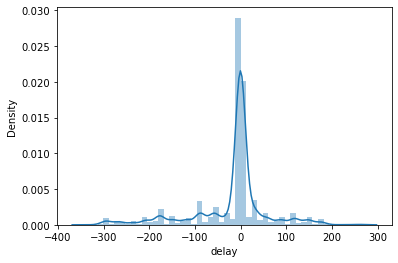

In [247]:
sns.distplot(y_train)

In [248]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27997 non-null  object        
 1   cust_number             27997 non-null  object        
 2   name_customer           27997 non-null  object        
 3   clear_date              27997 non-null  datetime64[ns]
 4   buisness_year           27997 non-null  int64         
 5   doc_id                  27997 non-null  int64         
 6   posting_date            27997 non-null  datetime64[ns]
 7   document_create_date    27997 non-null  datetime64[ns]
 8   document_create_date.1  27997 non-null  datetime64[ns]
 9   due_in_date             27997 non-null  datetime64[ns]
 10  invoice_currency        27997 non-null  object        
 11  total_open_amount       27997 non-null  float64       
 12  baseline_create_date    27997 non-null  dat

<AxesSubplot:xlabel='total_open_amount', ylabel='delay'>

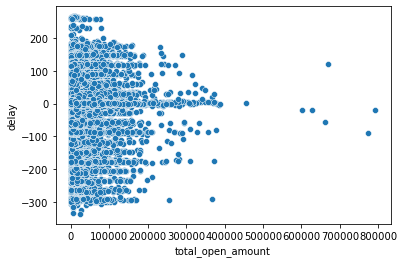

In [249]:
#here we can plot some scatter plot to see if any column is related to delay column or not
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='total_open_amount',y='delay')

### It says that it doesn't matter that if total_open_amount is high or low ,we are not getting linear relation

<AxesSubplot:xlabel='doc_id', ylabel='delay'>

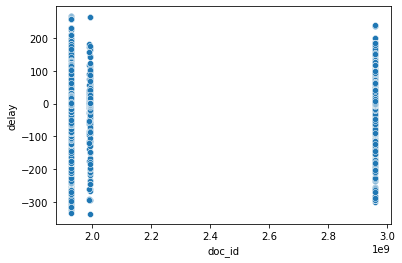

In [250]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='doc_id',y='delay')

#### NO relation seen between doc_id and delay

<AxesSubplot:xlabel='buisness_year', ylabel='delay'>

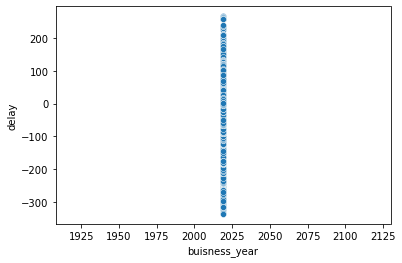

In [251]:
sns.scatterplot(data=X_train.merge(y_train,on=X_train.index),x='buisness_year',y='delay')

#### No relation between business_year and dely column also

<AxesSubplot:>

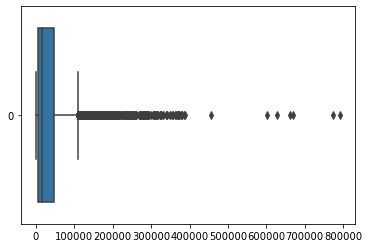

In [252]:
sns.boxplot(data=X_train.total_open_amount,orient='h')

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

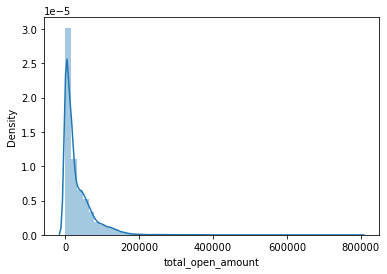

In [253]:
sns.distplot(X_train['total_open_amount'])

<AxesSubplot:xlabel='doc_id', ylabel='total_open_amount'>

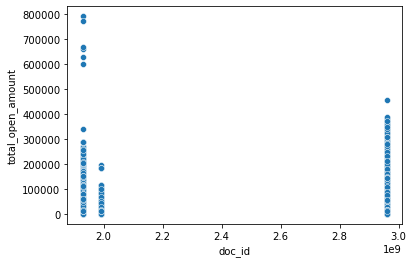

In [254]:
sns.scatterplot(data=X_train,x='doc_id',y='total_open_amount')#not related

<AxesSubplot:xlabel='doc_id', ylabel='invoice_id'>

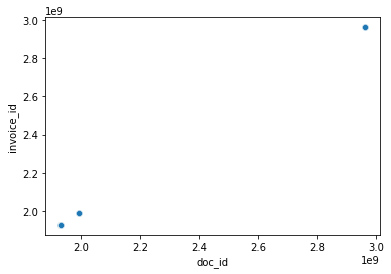

In [255]:
sns.scatterplot(data=X_train,x='doc_id',y='invoice_id')#not related

In [256]:
X_train[['doc_id','invoice_id']].corr() 

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


#### As we can see the doc_id and invoice_id are very correlated from corr() funtion and the scatter plot. So we can drop any one column

In [257]:
# Deleting invoice_id column from all X_train,X_val,X_test means from train,validation and local test dataset
X_train.drop(['invoice_id'],axis=1,inplace=True)
X_val.drop(['invoice_id'],axis=1,inplace=True)
X_test.drop(['invoice_id'],axis=1,inplace=True)
X_train.shape,X_val.shape,X_test.shape

((27997, 14), (8399, 14), (3600, 14))

In [258]:
X_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
46404,U001,200704045,RA llc,2019-01-02,2019,1928625003,2019-01-16,2019-01-15,2019-01-16,2019-01-31,USD,60562.39,2019-01-16,NAA8
3823,U001,200886415,COSTCO systems,2019-01-02,2019,1928608925,2019-01-16,2019-01-11,2019-01-16,2019-01-31,USD,5276.40,2019-01-16,NAA8
26187,U001,200762301,C&S WH corporation,2019-01-02,2019,1928637124,2019-01-18,2019-01-17,2019-01-18,2019-02-02,USD,17517.96,2019-01-18,NAC6
2440,U001,200776463,KROGE associates,2019-01-02,2019,1928638844,2019-01-17,2019-01-17,2019-01-17,2019-02-01,USD,2646.76,2019-01-17,NAA8
5380,U001,100035877,DUNKIN systems,2019-01-02,2019,1928613000,2019-01-16,2019-01-11,2019-01-16,2019-01-31,USD,5973.28,2019-01-16,NAA8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23066,U013,CC6530,HEINZ systems,2019-10-28,2019,1991831763,2019-10-09,2019-09-10,2019-09-10,2019-10-25,USD,13636.50,2019-09-10,NAVF
32635,U001,200794332,COST co,2019-10-28,2019,1930007993,2019-10-14,2019-10-13,2019-10-14,2019-10-29,USD,81653.80,2019-10-14,NAAX
28941,U001,100043880,ALP systems,2019-10-28,2019,1930010711,2019-10-17,2019-10-14,2019-10-17,2019-11-01,USD,17799.00,2019-10-17,NAA8
25150,U001,200729290,KROGER us,2019-10-28,2019,1930009152,2019-10-13,2019-10-14,2019-10-13,2019-10-28,USD,58774.77,2019-10-13,NAA8


# Feature Engineering

### Now for Model prediction we need every feature to be in integer or float dtype So we will convert all dtype to int or float.

In [259]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27997 non-null  object        
 1   cust_number             27997 non-null  object        
 2   name_customer           27997 non-null  object        
 3   clear_date              27997 non-null  datetime64[ns]
 4   buisness_year           27997 non-null  int64         
 5   doc_id                  27997 non-null  int64         
 6   posting_date            27997 non-null  datetime64[ns]
 7   document_create_date    27997 non-null  datetime64[ns]
 8   document_create_date.1  27997 non-null  datetime64[ns]
 9   due_in_date             27997 non-null  datetime64[ns]
 10  invoice_currency        27997 non-null  object        
 11  total_open_amount       27997 non-null  float64       
 12  baseline_create_date    27997 non-null  dat

#### Only 3 column out of 14 are in int or float dtype

In [260]:
# let's begin by encodding the object dtype columns into int or float

X_train['business_code'].unique()# -->Gives us 5 unique values

array(['U001', 'CA02', 'U013', 'U002', 'Other codes'], dtype=object)

In [261]:
# Encodding by labelEncoder method
from sklearn.preprocessing import LabelEncoder

businesscode_enc = LabelEncoder()
X_train['businee_enc'] = businesscode_enc.fit_transform(X_train['business_code'])


In [262]:
X_train[['business_code','businee_enc']]

,business_code,businee_enc
46404,U001,2
3823,U001,2
26187,U001,2
2440,U001,2
5380,U001,2
...,...,...
23066,U013,4
32635,U001,2
28941,U001,2
25150,U001,2


In [263]:
X_train['businee_enc'].unique()

array([2, 0, 4, 3, 1])

In [264]:
list(businesscode_enc.inverse_transform([2, 0, 4, 3, 1]))#corresponding encoded value

['U001', 'CA02', 'U013', 'U002', 'Other codes']

#### we can see that 2-->U001, 0-->CA02, 4-->U013, 3-->U002 and 1-->Other codes

In [265]:
# changing validation set and local test set also
X_val['businee_enc'] = businesscode_enc.fit_transform(X_val['business_code'])
X_test['businee_enc'] = businesscode_enc.fit_transform(X_test['business_code'])
X_train.shape,X_val.shape,X_test.shape

((27997, 15), (8399, 15), (3600, 15))

In [266]:
## Now we can drop the business_code column which contains object type values
X_train.drop(['business_code'],axis=1,inplace=True)
X_val.drop(['business_code'],axis=1,inplace=True)
X_test.drop(['business_code'],axis=1,inplace=True)

### Creating a drop function for dropping columns so we don't have to write these three lines again nad again.

In [267]:
def dropcol(col,t=X_train,v=X_val,tes = X_test):
    t.drop([col],axis=1,inplace=True)
    v.drop([col],axis=1,inplace=True)
    tes.drop([col],axis=1,inplace=True)
    
    return t, v, tes

In [268]:
# Encodding by labelEncoder method
# Encodding the cust_number column

cust_num_encd = LabelEncoder()
X_train['cust_num_encd'] = cust_num_encd.fit_transform(X_train['cust_number'])
X_val['cust_num_encd'] = cust_num_encd.fit_transform(X_val['cust_number'])
X_test['cust_num_encd'] = cust_num_encd.fit_transform(X_test['cust_number'])

In [269]:
X_train, X_val, X_test = dropcol('cust_number')

In [270]:
# Encodding by labelEncoder method
# Encodding the  name_customer column

name_cust_encd = LabelEncoder()
X_train['name_cust_encd'] = name_cust_encd.fit_transform(X_train['name_customer'])
X_val['name_cust_encd'] = name_cust_encd.fit_transform(X_val['name_customer'])
X_test['name_cust_encd'] = name_cust_encd.fit_transform(X_test['name_customer'])

In [271]:
X_train, X_val, X_test = dropcol('name_customer')

In [272]:
# Encodding by labelEncoder method
# Encodding the  invoice_currency column

invoice_currency_encd = LabelEncoder()
X_train['invoice_currency_encd'] = invoice_currency_encd.fit_transform(X_train['invoice_currency'])
X_val['invoice_currency_encd'] = invoice_currency_encd.fit_transform(X_val['invoice_currency'])
X_test['invoice_currency_encd'] = invoice_currency_encd.fit_transform(X_test['invoice_currency'])

In [273]:
X_train, X_val, X_test = dropcol('invoice_currency')

In [274]:
# Encodding by labelEncoder method
# Encodding the cust_payment_terms column

cust_pay_terms_encd = LabelEncoder()
X_train['cust_pay_terms_encd'] = cust_pay_terms_encd.fit_transform(X_train['cust_payment_terms'])
X_val['cust_pay_terms_encd'] = cust_pay_terms_encd.fit_transform(X_val['cust_payment_terms'])
X_test['cust_pay_terms_encd'] = cust_pay_terms_encd.fit_transform(X_test['cust_payment_terms'])

In [275]:
X_train, X_val, X_test = dropcol('cust_payment_terms')

In [276]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              27997 non-null  datetime64[ns]
 1   buisness_year           27997 non-null  int64         
 2   doc_id                  27997 non-null  int64         
 3   posting_date            27997 non-null  datetime64[ns]
 4   document_create_date    27997 non-null  datetime64[ns]
 5   document_create_date.1  27997 non-null  datetime64[ns]
 6   due_in_date             27997 non-null  datetime64[ns]
 7   total_open_amount       27997 non-null  float64       
 8   baseline_create_date    27997 non-null  datetime64[ns]
 9   businee_enc             27997 non-null  int32         
 10  cust_num_encd           27997 non-null  int32         
 11  name_cust_encd          27997 non-null  int32         
 12  invoice_currency_encd   27997 non-null  int

### Now we have converted all object dtype value into int dtype value so we will start date manipulation process.

### Splitting clear_date column into day,weekday and month column

#### First we will drop clear_date column because it would not be given in the future datasets so it won't be useful to predixt Delays

In [277]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              27997 non-null  datetime64[ns]
 1   buisness_year           27997 non-null  int64         
 2   doc_id                  27997 non-null  int64         
 3   posting_date            27997 non-null  datetime64[ns]
 4   document_create_date    27997 non-null  datetime64[ns]
 5   document_create_date.1  27997 non-null  datetime64[ns]
 6   due_in_date             27997 non-null  datetime64[ns]
 7   total_open_amount       27997 non-null  float64       
 8   baseline_create_date    27997 non-null  datetime64[ns]
 9   businee_enc             27997 non-null  int32         
 10  cust_num_encd           27997 non-null  int32         
 11  name_cust_encd          27997 non-null  int32         
 12  invoice_currency_encd   27997 non-null  int

#### Now we can drop the dateyime column clear_date from all train,Val and test set

In [278]:
X_train, X_val,X_test = dropcol('clear_date')

### Splitting posting_date column into day,weekday and month column

In [279]:
# Date Manipulation in train into day,day of the week and month
X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_train['posting_date_weekday']  = X_train['posting_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['posting_date_day'] = X_val['posting_date'].dt.day
X_val['posting_date_month'] = X_val['posting_date'].dt.month
X_val['posting_date_weekday']  = X_val['posting_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['posting_date_day'] = X_test['posting_date'].dt.day
X_test['posting_date_month'] = X_test['posting_date'].dt.month
X_test['posting_date_weekday']  = X_test['posting_date'].dt.weekday

In [280]:
#Dropping posting_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('posting_date')

### Splitting document_create_date into day,month and weekday

In [281]:
# Date Manipulation in train into day,day of the week and month
X_train['document_create_date_day'] = X_train['document_create_date'].dt.day
X_train['document_create_date_month'] = X_train['document_create_date'].dt.month
X_train['document_create_date_weekday']  = X_train['document_create_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['document_create_date_day'] = X_val['document_create_date'].dt.day
X_val['document_create_date_month'] = X_val['document_create_date'].dt.month
X_val['document_create_date_weekday']  = X_val['document_create_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['document_create_date_day'] = X_test['document_create_date'].dt.day
X_test['document_create_date_month'] = X_test['document_create_date'].dt.month
X_test['document_create_date_weekday']  = X_test['document_create_date'].dt.weekday

In [282]:
#Dropping document_create_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('document_create_date')

### Splitting document_create_date.1 into day,month and weekday

In [283]:
# Date Manipulation in train into day,day of the week and month
X_train['document_create_date.1_day'] = X_train['document_create_date.1'].dt.day
X_train['document_create_date.1_month'] = X_train['document_create_date.1'].dt.month
X_train['document_create_date.1_weekday']  = X_train['document_create_date.1'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['document_create_date.1_day'] = X_val['document_create_date.1'].dt.day
X_val['document_create_date.1_month'] = X_val['document_create_date.1'].dt.month
X_val['document_create_date.1_weekday']  = X_val['document_create_date.1'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['document_create_date.1_day'] = X_test['document_create_date.1'].dt.day
X_test['document_create_date.1_month'] = X_test['document_create_date.1'].dt.month
X_test['document_create_date.1_weekday']  = X_test['document_create_date.1'].dt.weekday

In [284]:
#Dropping document_create_date.1 column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('document_create_date.1')

### Splitting due_in_date into day,month and weekday

In [285]:
# Date Manipulation in train into day,day of the week and month
X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_train['due_in_date_month'] = X_train['due_in_date'].dt.month
X_train['due_in_date_weekday']  = X_train['due_in_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['due_in_date_day'] = X_val['due_in_date'].dt.day
X_val['due_in_date_month'] = X_val['due_in_date'].dt.month
X_val['due_in_date_weekday']  = X_val['due_in_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['due_in_date_day'] = X_test['due_in_date'].dt.day
X_test['due_in_date_month'] = X_test['due_in_date'].dt.month
X_test['due_in_date_weekday']  = X_test['due_in_date'].dt.weekday

In [286]:
#Dropping dur_in_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('due_in_date')

### Splitting baseline_create_date into day,month and weekday

In [287]:
# Date Manipulation in train into day,day of the week and month
X_train['baseline_create_date_day'] = X_train['baseline_create_date'].dt.day
X_train['baseline_create_date_month'] = X_train['baseline_create_date'].dt.month
X_train['baseline_create_date_weekday']  = X_train['baseline_create_date'].dt.weekday

# Date Manipulation in validaiton set into day,day of the week and month
X_val['baseline_create_date_day'] = X_val['baseline_create_date'].dt.day
X_val['baseline_create_date_month'] = X_val['baseline_create_date'].dt.month
X_val['baseline_create_date_weekday']  = X_val['baseline_create_date'].dt.weekday

# Date Manipulation in local test set into day,day of the week and month
X_test['baseline_create_date_day'] = X_test['baseline_create_date'].dt.day
X_test['baseline_create_date_month'] = X_test['baseline_create_date'].dt.month
X_test['baseline_create_date_weekday']  = X_test['baseline_create_date'].dt.weekday

In [288]:
#Dropping baseline_create_date column after splitting it into day,month and weekday
X_train, X_val, X_test = dropcol('baseline_create_date')

In [289]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27997 entries, 46404 to 4457
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   buisness_year                   27997 non-null  int64  
 1   doc_id                          27997 non-null  int64  
 2   total_open_amount               27997 non-null  float64
 3   businee_enc                     27997 non-null  int32  
 4   cust_num_encd                   27997 non-null  int32  
 5   name_cust_encd                  27997 non-null  int32  
 6   invoice_currency_encd           27997 non-null  int32  
 7   cust_pay_terms_encd             27997 non-null  int32  
 8   posting_date_day                27997 non-null  int64  
 9   posting_date_month              27997 non-null  int64  
 10  posting_date_weekday            27997 non-null  int64  
 11  document_create_date_day        27997 non-null  int64  
 12  document_create_date_month   

## we can see that every column in out dataset are in Dtype int or float type

# Feature Selection

### For better understanding of Corelation we can plot heat map of correlation matrix

In [290]:
corrmat = X_train.merge(y_train,on=X_train.index).corr()

<AxesSubplot:>

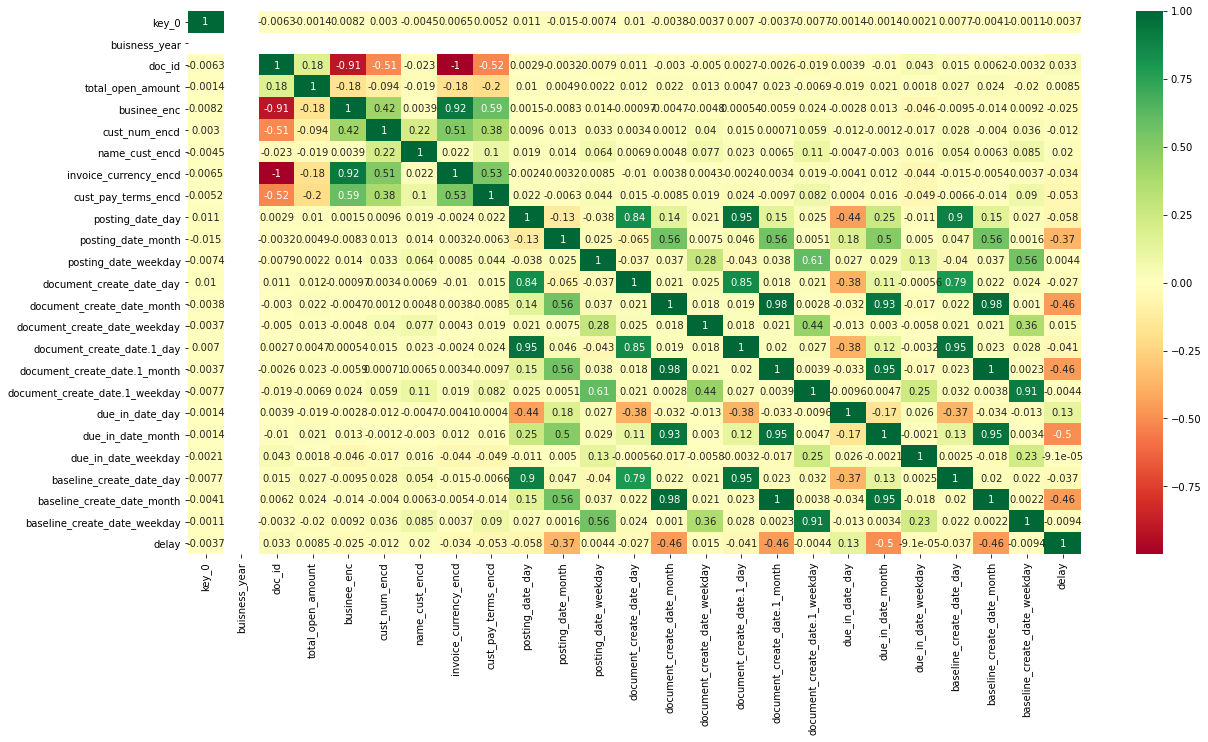

In [291]:
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

#### We can see the correlation between document_create_date and baseline_create_date,days are 95% similar and month is 99.8% similar and the weekday is 91% related

In [292]:
# So we can drop any one of the column 
# dropping document_create_date.1_day,document_create_date.1_month, and documnent_create_date.1_weekday
X_train.drop(['document_create_date.1_day','document_create_date.1_month','document_create_date.1_weekday'],axis=1,inplace=True)
# Dropping from validation and test set also 
X_val.drop(['document_create_date.1_day','document_create_date.1_month','document_create_date.1_weekday'],axis=1,inplace=True)
X_test.drop(['document_create_date.1_day','document_create_date.1_month','document_create_date.1_weekday'],axis=1,inplace=True)

### we can see see that document_create_date_month is 98% correlated with baseline_create_date_month so we can drop any one of the column and also the due_in_date_month is 95% correlated with baseline_create_date_month so we can drop any one of the column.

In [293]:
X_train,X_val,X_test = dropcol('document_create_date_month')

In [294]:
X_train,X_val,X_test = dropcol('due_in_date_month')

## Univariate Selection

In [295]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [296]:
#applying SelectKBest class to extract top 10 best feature with respect to target column
bestfeature = SelectKBest(score_func=chi2,k=10)
ft = bestfeature.fit(X_train,y_train)

In [297]:
scores = pd.DataFrame(ft.scores_)
colums = pd.DataFrame(X_train.columns)

In [298]:
featurescores = pd.concat([colums,scores],axis=1)
featurescores.columns = ['feature','Score']
featurescores

,feature,Score
0,buisness_year,6.165844e-26
1,doc_id,1.765340e+11
2,total_open_amount,7.173419e+07
3,businee_enc,6.912338e+02
4,cust_num_encd,1.672745e+05
5,name_cust_encd,4.070001e+06
6,invoice_currency_encd,3.598225e+02
7,cust_pay_terms_encd,2.786357e+04
8,posting_date_day,3.745180e+04
9,posting_date_month,9.838749e+03


In [299]:
print(featurescores.nlargest(10,'Score'))

                       feature         Score
1                       doc_id  1.765340e+11
2            total_open_amount  7.173419e+07
5               name_cust_encd  4.070001e+06
4                cust_num_encd  1.672745e+05
13             due_in_date_day  6.884265e+04
8             posting_date_day  3.745180e+04
15    baseline_create_date_day  3.400982e+04
7          cust_pay_terms_encd  2.786357e+04
11    document_create_date_day  2.775411e+04
16  baseline_create_date_month  1.182592e+04


## Feature importance method

In [300]:
from sklearn.ensemble import ExtraTreesRegressor
mod = ExtraTreesRegressor()
mod.fit(X_train,y_train)

ExtraTreesRegressor()

In [301]:
mod.feature_importances_

array([0.        , 0.0383254 , 0.04885263, 0.00471128, 0.0502871 ,
       0.09365387, 0.00330628, 0.05726044, 0.0632781 , 0.07155093,
       0.01440416, 0.04298688, 0.02159539, 0.13996345, 0.01874378,
       0.08271168, 0.23253123, 0.01583739])

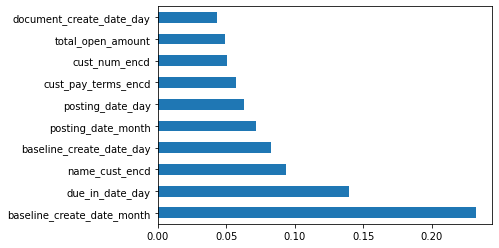

In [302]:
feat_imp = pd.Series(mod.feature_importances_,index=X_train.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

In [303]:
corrmat

,key_0,buisness_year,doc_id,total_open_amount,businee_enc,cust_num_encd,name_cust_encd,invoice_currency_encd,cust_pay_terms_encd,posting_date_day,...,document_create_date.1_day,document_create_date.1_month,document_create_date.1_weekday,due_in_date_day,due_in_date_month,due_in_date_weekday,baseline_create_date_day,baseline_create_date_month,baseline_create_date_weekday,delay
key_0,1.000000,NaN,-0.006254,-0.001409,0.008207,0.002998,-0.004468,0.006451,0.005238,0.010634,...,0.006988,-0.003742,-0.007657,-0.001449,-0.001382,0.002109,0.007670,-0.004128,-0.001088,-0.003678
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.006254,NaN,1.000000,0.179572,-0.911525,-0.513532,-0.022965,-0.999608,-0.520724,0.002907,...,0.002721,-0.002557,-0.018693,0.003940,-0.010289,0.043459,0.015287,0.006173,-0.003224,0.033450
total_open_amount,-0.001409,NaN,0.179572,1.000000,-0.175115,-0.094044,-0.019281,-0.180173,-0.204019,0.010327,...,0.004732,0.023073,-0.006942,-0.018650,0.020661,0.001833,0.026917,0.023958,-0.019924,0.008482
businee_enc,0.008207,NaN,-0.911525,-0.175115,1.000000,0.418248,0.003903,0.922387,0.586663,0.001547,...,0.000541,-0.005860,0.023545,-0.002831,0.012646,-0.046048,-0.009507,-0.013840,0.009186,-0.024607
cust_num_encd,0.002998,NaN,-0.513532,-0.094044,0.418248,1.000000,0.218005,0.510272,0.379426,0.009596,...,0.014659,0.000707,0.058807,-0.011997,-0.001184,-0.017216,0.028430,-0.003993,0.035898,-0.012117
name_cust_encd,-0.004468,NaN,-0.022965,-0.019281,0.003903,0.218005,1.000000,0.021842,0.100724,0.018759,...,0.022738,0.006521,0.107978,-0.004731,-0.003040,0.016091,0.053722,0.006291,0.085249,0.020168
invoice_currency_encd,0.006451,NaN,-0.999608,-0.180173,0.922387,0.510272,0.021842,1.000000,0.527553,-0.002360,...,-0.002432,0.003358,0.019212,-0.004064,0.011926,-0.043860,-0.014894,-0.005371,0.003724,-0.033694
cust_pay_terms_encd,0.005238,NaN,-0.520724,-0.204019,0.586663,0.379426,0.100724,0.527553,1.000000,0.022400,...,0.024400,-0.009748,0.082342,0.000397,0.015659,-0.048937,-0.006606,-0.013833,0.089729,-0.053345
posting_date_day,0.010634,NaN,0.002907,0.010327,0.001547,0.009596,0.018759,-0.002360,0.022400,1.000000,...,0.946722,0.147424,0.024968,-0.438779,0.251856,-0.010554,0.896444,0.150697,0.027036,-0.057682


### As you can notice column buisness_year has no colrrelation between any any column so we can drop that column.

In [304]:
X_train,X_val,X_test = dropcol('buisness_year')

In [305]:
X_train.shape,X_val.shape,X_test.shape

((27997, 17), (8399, 17), (3600, 17))

# Machine Learning Model

In [306]:
X_train = pd.concat([X_train,X_val])
X_train

,doc_id,total_open_amount,businee_enc,cust_num_encd,name_cust_encd,invoice_currency_encd,cust_pay_terms_encd,posting_date_day,posting_date_month,posting_date_weekday,document_create_date_day,document_create_date_weekday,due_in_date_day,due_in_date_weekday,baseline_create_date_day,baseline_create_date_month,baseline_create_date_weekday
46404,1928625003,60562.39,2,600,2417,1,19,16,1,2,15,1,31,3,16,1,2
3823,1928608925,5276.40,2,849,662,1,19,16,1,2,11,4,31,3,16,1,2
26187,1928637124,17517.96,2,726,444,1,24,18,1,4,17,3,2,5,18,1,4
2440,1928638844,2646.76,2,756,1680,1,19,17,1,3,17,3,1,4,17,1,3
5380,1928613000,5973.28,2,137,878,1,19,16,1,2,11,4,31,3,16,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36954,1930463418,73299.31,2,47,1167,1,25,31,1,4,31,4,6,4,31,1,4
17297,2960609405,6563.53,0,175,1556,0,2,24,1,4,24,4,10,0,31,1,4
39886,1930444334,168736.44,2,349,1261,1,14,29,1,2,27,0,13,3,29,1,2
17856,1930453624,238.60,2,379,186,1,14,29,1,2,29,2,13,3,29,1,2


In [307]:
y_train = pd.concat([y_train,y_val])
y_train

46404   -29.0
3823    -29.0
26187   -31.0
2440    -30.0
5380    -29.0
         ... 
36954   -22.0
17297     3.0
39886     0.0
17856     0.0
3443      4.0
Name: delay, Length: 36396, dtype: float64

In [308]:
y_train.shape,X_train.shape

((36396,), (36396, 17))

# linearRegressor Mode

In [309]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
R2_Score = []
Algorithm = []

In [310]:
from sklearn.linear_model import LinearRegression
Algorithm.append('Linear Regression')
base_model = LinearRegression()
base_model.fit(X_train[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']],y_train)

LinearRegression()

In [311]:
from sklearn.metrics import r2_score

In [312]:
predicted = base_model.predict(X_test[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']])
MSE_Score.append(mean_squared_error(y_test,predicted,squared=False))
R2_Score.append(r2_score(predicted,y_test))

# Decision Tree Model

In [313]:
# trying another model
Algorithm.append('Decision Tree Regressor')
from sklearn.tree import DecisionTreeRegressor

### Trying features selected by featureImportance method

In [314]:
tree_model3 = DecisionTreeRegressor(max_depth=18)
tree_model3.fit(X_train[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']],y_train)


predictedTreetest = tree_model3.predict(X_test[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']])
MSE_Score.append(mean_squared_error(y_test,predictedTreetest,squared=False))
R2_Score.append(r2_score(y_test,predictedTreetest))

# Random Forest Model

In [315]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
RFR = RandomForestRegressor()

### feature Importance Method features

In [316]:
RFR.fit(X_train[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']],y_train)

predictedTreeRFR = RFR.predict(X_test[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']])
MSE_Score.append(mean_squared_error(y_test,predictedTreeRFR,squared=False))
R2_Score.append(r2_score(y_test,predictedTreeRFR))

# XGB Regressor Model

In [317]:
from xgboost import XGBRegressor

In [318]:

Algorithm.append('XGB Regressor')

### XGBoost hyper-parameter tuning

In [319]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_tuning = {
        'learning_rate': [0.05, 0.1,0.15,0.20],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500]
    }

XGB = XGBRegressor()

rndsearch = RandomizedSearchCV(XGB,
                           param_distributions= param_tuning,
                           n_iter=5,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 3)


    

In [320]:
rndsearch.fit(X_train[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']],y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   21.5s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [321]:
# The best hyperparameters of the whole XGB
rndsearch.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [322]:
# The best hyperparameter from the parameters we gave
rndsearch.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.5}

In [323]:
# Applying all best parameters in XGBRegressor
regressorXGB = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1,monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [324]:
regressorXGB.fit(X_train[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']],y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [325]:
predictedXGB = regressorXGB.predict(X_test[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']])
MSE_Score.append(mean_squared_error(y_test,predictedXGB,squared=False))
R2_Score.append(r2_score(y_test,predictedXGB))

# Support Vector Regression

In [326]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')

svr = SVR()

### With features of feature importance method

In [327]:
svr.fit(X_train[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']],y_train)

predictedsvr = svr.predict(X_test[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']])
MSE_Score.append(mean_squared_error(y_test,predictedsvr,squared=False))
R2_Score.append(r2_score(y_test,predictedsvr))

In [328]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [329]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,114.743056,-232.405999
1,Decision Tree Regressor,175.908131,-2.182073
2,Random Forest Regressor,131.095707,-0.767320
3,XGB Regressor,111.414747,-0.276509
4,Support Vector Regression,122.558181,-0.544625


## Applying model to our main test dataset with clear date null

In [330]:
mtback = Mtest.copy()
mtback

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
5,U001,200744019,TARG us,NaT,2020,1930826764,2020-04-26,2020-04-25,2020-04-26,2020-05-11,USD,RV,1,NaN,22133.32,2020-04-26,NAA8,1.930827e+09,1,NaN
6,U001,200416837,DEC foundation,NaT,2020,1930698491,2020-03-25,2020-03-25,2020-03-25,2020-04-08,USD,RV,1,NaN,5801.78,2020-03-16,NAM4,1.930698e+09,1,NaN
8,U001,200769623,WAL-MAR co,NaT,2020,1930730740,2020-02-04,2020-04-02,2020-04-02,2020-04-17,USD,RV,1,NaN,8727.36,2020-04-02,NAH4,1.930731e+09,1,NaN
9,U001,200782669,SYGMA associates,NaT,2020,1930745160,2020-06-04,2020-04-03,2020-04-06,2020-04-21,USD,RV,1,NaN,839.31,2020-04-06,NAA8,1.930745e+09,1,NaN
16,U001,200726979,BJ'S trust,NaT,2020,1930778645,2020-12-04,2020-04-11,2020-04-12,2020-04-27,USD,RV,1,NaN,2102.49,2020-04-12,NAA8,1.930779e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,200769623,WAL-MAR corp,NaT,2020,1930699466,2020-03-26,2020-03-25,2020-03-26,2020-04-10,USD,RV,1,NaN,661.11,2020-03-26,NAH4,1.930699e+09,1,NaN
49979,U001,200769623,WAL-MAR,NaT,2020,1930860950,2020-07-05,2020-05-05,2020-05-07,2020-05-22,USD,RV,1,NaN,51927.43,2020-05-07,NAH4,1.930861e+09,1,NaN
49985,CA02,140106408,WAL-M us,NaT,2020,2960622702,2020-03-19,2020-03-19,2020-03-19,2020-03-29,CAD,RV,1,NaN,60119.42,2020-03-19,CA10,2.960623e+09,1,NaN
49988,U001,200762301,C&S WH associates,NaT,2020,1930653444,2020-03-16,2020-03-15,2020-03-16,2020-03-31,USD,RV,1,NaN,1076.74,2020-03-16,NAC6,1.930653e+09,1,NaN


In [331]:
Mtest

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
5,U001,200744019,TARG us,NaT,2020,1930826764,2020-04-26,2020-04-25,2020-04-26,2020-05-11,USD,RV,1,NaN,22133.32,2020-04-26,NAA8,1.930827e+09,1,NaN
6,U001,200416837,DEC foundation,NaT,2020,1930698491,2020-03-25,2020-03-25,2020-03-25,2020-04-08,USD,RV,1,NaN,5801.78,2020-03-16,NAM4,1.930698e+09,1,NaN
8,U001,200769623,WAL-MAR co,NaT,2020,1930730740,2020-02-04,2020-04-02,2020-04-02,2020-04-17,USD,RV,1,NaN,8727.36,2020-04-02,NAH4,1.930731e+09,1,NaN
9,U001,200782669,SYGMA associates,NaT,2020,1930745160,2020-06-04,2020-04-03,2020-04-06,2020-04-21,USD,RV,1,NaN,839.31,2020-04-06,NAA8,1.930745e+09,1,NaN
16,U001,200726979,BJ'S trust,NaT,2020,1930778645,2020-12-04,2020-04-11,2020-04-12,2020-04-27,USD,RV,1,NaN,2102.49,2020-04-12,NAA8,1.930779e+09,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,200769623,WAL-MAR corp,NaT,2020,1930699466,2020-03-26,2020-03-25,2020-03-26,2020-04-10,USD,RV,1,NaN,661.11,2020-03-26,NAH4,1.930699e+09,1,NaN
49979,U001,200769623,WAL-MAR,NaT,2020,1930860950,2020-07-05,2020-05-05,2020-05-07,2020-05-22,USD,RV,1,NaN,51927.43,2020-05-07,NAH4,1.930861e+09,1,NaN
49985,CA02,140106408,WAL-M us,NaT,2020,2960622702,2020-03-19,2020-03-19,2020-03-19,2020-03-29,CAD,RV,1,NaN,60119.42,2020-03-19,CA10,2.960623e+09,1,NaN
49988,U001,200762301,C&S WH associates,NaT,2020,1930653444,2020-03-16,2020-03-15,2020-03-16,2020-03-31,USD,RV,1,NaN,1076.74,2020-03-16,NAC6,1.930653e+09,1,NaN


In [332]:
Mtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5 to 49995
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           10000 non-null  int64         
 5   doc_id                  10000 non-null  int64         
 6   posting_date            10000 non-null  datetime64[ns]
 7   document_create_date    10000 non-null  datetime64[ns]
 8   document_create_date.1  10000 non-null  datetime64[ns]
 9   due_in_date             10000 non-null  datetime64[ns]
 10  invoice_currency        10000 non-null  object        
 11  document type           10000 non-null  object        
 12  posting_id              10000 non-null  int64 

In [333]:
#Checking null values in each column
# Null imputation
Mtest.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
delay                     10000
dtype: int64

In [334]:
#dropping all null values column
Mtest.drop(['clear_date','area_business','delay'],axis=1,inplace=True)
Mtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5 to 49995
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           10000 non-null  object        
 1   cust_number             10000 non-null  object        
 2   name_customer           10000 non-null  object        
 3   buisness_year           10000 non-null  int64         
 4   doc_id                  10000 non-null  int64         
 5   posting_date            10000 non-null  datetime64[ns]
 6   document_create_date    10000 non-null  datetime64[ns]
 7   document_create_date.1  10000 non-null  datetime64[ns]
 8   due_in_date             10000 non-null  datetime64[ns]
 9   invoice_currency        10000 non-null  object        
 10  document type           10000 non-null  object        
 11  posting_id              10000 non-null  int64         
 12  total_open_amount       10000 non-null  float6

In [335]:
#checking unique values
Mtest.nunique()

business_code                6
cust_number                542
name_customer             1773
buisness_year                1
doc_id                    9718
posting_date                84
document_create_date        92
document_create_date.1      84
due_in_date                123
invoice_currency             2
document type                1
posting_id                   1
total_open_amount         9040
baseline_create_date        86
cust_payment_terms          42
invoice_id                9718
isOpen                       1
dtype: int64

In [336]:
# dropping all constant column with only one value
Mtest.drop(['buisness_year','document type','posting_id','isOpen'],axis=1,inplace=True)
Mtest.nunique()

business_code                6
cust_number                542
name_customer             1773
doc_id                    9718
posting_date                84
document_create_date        92
document_create_date.1      84
due_in_date                123
invoice_currency             2
total_open_amount         9040
baseline_create_date        86
cust_payment_terms          42
invoice_id                9718
dtype: int64

In [337]:
Mtest.business_code.value_counts()

U001    9159
CA02     743
U013      66
U002      27
U005       4
U007       1
Name: business_code, dtype: int64

In [338]:
# Merging the least occuring values with respect to the other data so 'U005' and 'U007' becomes 'other codes'
Mtest['business_code'] = np.where(Mtest['business_code'].isin(['U005','U007']),'Other codes',Mtest['business_code'])
Mtest.business_code.value_counts()

U001           9159
CA02            743
U013             66
U002             27
Other codes       5
Name: business_code, dtype: int64

# Encodding

In [339]:
# Encodding by labelEncoder method
from sklearn.preprocessing import LabelEncoder

businesscode_enc = LabelEncoder()
Mtest['businee_enc'] = businesscode_enc.fit_transform(Mtest['business_code'])

In [340]:
Mtest.drop(['business_code'],axis=1,inplace=True)

In [341]:
#encodding cust_number
cust_num_encd = LabelEncoder()
Mtest['cust_num_encd'] = cust_num_encd.fit_transform(Mtest['cust_number'])

In [342]:
Mtest.drop(['cust_number'],axis=1,inplace=True)

In [343]:
# Encodding name_customer
name_cust_encd = LabelEncoder()
Mtest['name_cust_encd'] = name_cust_encd.fit_transform(Mtest['name_customer'])

In [344]:
Mtest.drop(['name_customer'],axis=1,inplace=True)

In [345]:
# Encodding invoice_currency
name_cust_encd = LabelEncoder()
Mtest['invoice_currency_encd'] = name_cust_encd.fit_transform(Mtest['invoice_currency'])

In [346]:
Mtest.drop(['invoice_currency'],axis=1,inplace=True)

In [347]:
# Encodding cust_payment_terms
name_cust_encd = LabelEncoder()
Mtest['cust_pay_terms_encd'] = name_cust_encd.fit_transform(Mtest['cust_payment_terms'])

In [348]:
Mtest.drop(['cust_payment_terms'],axis=1,inplace=True)

In [349]:
def daymonthweekday(col,tr=Mtest):
    tr[col+'_day'] = tr[col].dt.day
    tr[col+'_month'] = tr[col].dt.month
    tr[col+'_weekday']  = tr[col].dt.weekday

    return tr

In [350]:
Mtest = daymonthweekday('posting_date')

In [351]:
Mtest = daymonthweekday('document_create_date')

In [352]:
Mtest = daymonthweekday('due_in_date')

In [353]:
Mtest = daymonthweekday('baseline_create_date')

In [354]:
Mtest.drop(['posting_date','document_create_date','document_create_date.1','baseline_create_date'],axis=1,inplace=True)

# feature Engineerng
### we can drop all correlated columns with eachother and non correlated column to the target column

In [355]:
Mtest = Mtest[['due_in_date','due_in_date_day','due_in_date_weekday','due_in_date_month','document_create_date_weekday','name_cust_encd','cust_pay_terms_encd','cust_num_encd','doc_id']]
Mtest

,due_in_date,due_in_date_day,due_in_date_weekday,due_in_date_month,document_create_date_weekday,name_cust_encd,cust_pay_terms_encd,cust_num_encd,doc_id
5,2020-05-11,11,0,5,5,1589,12,389,1930826764
6,2020-04-08,8,2,4,2,398,30,269,1930698491
8,2020-04-17,17,4,4,3,1712,26,428,1930730740
9,2020-04-21,21,1,4,4,1520,12,454,1930745160
16,2020-04-27,27,0,4,5,191,12,360,1930778645
...,...,...,...,...,...,...,...,...,...
49978,2020-04-10,10,4,4,2,1713,26,428,1930699466
49979,2020-05-22,22,4,5,1,1710,26,428,1930860950
49985,2020-03-29,29,6,3,3,1709,2,200,2960622702
49988,2020-03-31,31,1,3,6,266,17,414,1930653444


# Model

In [359]:
Predicted_delay = regressorXGB.predict(Mtest[['due_in_date_day','name_cust_encd','cust_pay_terms_encd','cust_num_encd']])
Predicted_delay

array([ 19.075972 ,  10.108588 ,   3.6603565, ...,   2.5244644,
       -24.21449  , -42.896675 ], dtype=float32)

In [360]:
Predicted_delay = Predicted_delay.astype(int)
Predicted_delay

array([ 19,  10,   3, ...,   2, -24, -42])

In [361]:
Mtest['Predicted_Delay'] = Predicted_delay
Mtest

,due_in_date,due_in_date_day,due_in_date_weekday,due_in_date_month,document_create_date_weekday,name_cust_encd,cust_pay_terms_encd,cust_num_encd,doc_id,Predicted_Delay
5,2020-05-11,11,0,5,5,1589,12,389,1930826764,19
6,2020-04-08,8,2,4,2,398,30,269,1930698491,10
8,2020-04-17,17,4,4,3,1712,26,428,1930730740,3
9,2020-04-21,21,1,4,4,1520,12,454,1930745160,-28
16,2020-04-27,27,0,4,5,191,12,360,1930778645,-39
...,...,...,...,...,...,...,...,...,...,...
49978,2020-04-10,10,4,4,2,1713,26,428,1930699466,68
49979,2020-05-22,22,4,5,1,1710,26,428,1930860950,-4
49985,2020-03-29,29,6,3,3,1709,2,200,2960622702,2
49988,2020-03-31,31,1,3,6,266,17,414,1930653444,-24


In [362]:
Mtest['Predicted_clear_date'] = Mtest['due_in_date']+pd.to_timedelta(Mtest['Predicted_Delay'],unit='d')
Mtest

,due_in_date,due_in_date_day,due_in_date_weekday,due_in_date_month,document_create_date_weekday,name_cust_encd,cust_pay_terms_encd,cust_num_encd,doc_id,Predicted_Delay,Predicted_clear_date
5,2020-05-11,11,0,5,5,1589,12,389,1930826764,19,2020-05-30
6,2020-04-08,8,2,4,2,398,30,269,1930698491,10,2020-04-18
8,2020-04-17,17,4,4,3,1712,26,428,1930730740,3,2020-04-20
9,2020-04-21,21,1,4,4,1520,12,454,1930745160,-28,2020-03-24
16,2020-04-27,27,0,4,5,191,12,360,1930778645,-39,2020-03-19
...,...,...,...,...,...,...,...,...,...,...,...
49978,2020-04-10,10,4,4,2,1713,26,428,1930699466,68,2020-06-17
49979,2020-05-22,22,4,5,1,1710,26,428,1930860950,-4,2020-05-18
49985,2020-03-29,29,6,3,3,1709,2,200,2960622702,2,2020-03-31
49988,2020-03-31,31,1,3,6,266,17,414,1930653444,-24,2020-03-07


In [364]:
mtback.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
5,U001,200744019,TARG us,NaT,2020,1930826764,2020-04-26,2020-04-25,2020-04-26,2020-05-11,USD,RV,1,NaN,22133.32,2020-04-26,NAA8,1.930827e+09,1,NaN
6,U001,200416837,DEC foundation,NaT,2020,1930698491,2020-03-25,2020-03-25,2020-03-25,2020-04-08,USD,RV,1,NaN,5801.78,2020-03-16,NAM4,1.930698e+09,1,NaN
8,U001,200769623,WAL-MAR co,NaT,2020,1930730740,2020-02-04,2020-04-02,2020-04-02,2020-04-17,USD,RV,1,NaN,8727.36,2020-04-02,NAH4,1.930731e+09,1,NaN
9,U001,200782669,SYGMA associates,NaT,2020,1930745160,2020-06-04,2020-04-03,2020-04-06,2020-04-21,USD,RV,1,NaN,839.31,2020-04-06,NAA8,1.930745e+09,1,NaN
16,U001,200726979,BJ'S trust,NaT,2020,1930778645,2020-12-04,2020-04-11,2020-04-12,2020-04-27,USD,RV,1,NaN,2102.49,2020-04-12,NAA8,1.930779e+09,1,NaN


In [366]:
mtback[['name_customer','cust_number','invoice_id','total_open_amount','due_in_date']]

,name_customer,cust_number,invoice_id,total_open_amount,due_in_date
5,TARG us,200744019,1.930827e+09,22133.32,2020-05-11
6,DEC foundation,200416837,1.930698e+09,5801.78,2020-04-08
8,WAL-MAR co,200769623,1.930731e+09,8727.36,2020-04-17
9,SYGMA associates,200782669,1.930745e+09,839.31,2020-04-21
16,BJ'S trust,200726979,1.930779e+09,2102.49,2020-04-27
...,...,...,...,...,...
49978,WAL-MAR corp,200769623,1.930699e+09,661.11,2020-04-10
49979,WAL-MAR,200769623,1.930861e+09,51927.43,2020-05-22
49985,WAL-M us,140106408,2.960623e+09,60119.42,2020-03-29
49988,C&S WH associates,200762301,1.930653e+09,1076.74,2020-03-31


In [369]:
mtback['Predicted_clear_date'] = Mtest['Predicted_clear_date']

In [371]:
mtback = mtback[['name_customer','cust_number','invoice_id','total_open_amount','due_in_date','Predicted_clear_date']]

In [372]:
mtback

,name_customer,cust_number,invoice_id,total_open_amount,due_in_date,Predicted_clear_date
5,TARG us,200744019,1.930827e+09,22133.32,2020-05-11,2020-05-30
6,DEC foundation,200416837,1.930698e+09,5801.78,2020-04-08,2020-04-18
8,WAL-MAR co,200769623,1.930731e+09,8727.36,2020-04-17,2020-04-20
9,SYGMA associates,200782669,1.930745e+09,839.31,2020-04-21,2020-03-24
16,BJ'S trust,200726979,1.930779e+09,2102.49,2020-04-27,2020-03-19
...,...,...,...,...,...,...
49978,WAL-MAR corp,200769623,1.930699e+09,661.11,2020-04-10,2020-06-17
49979,WAL-MAR,200769623,1.930861e+09,51927.43,2020-05-22,2020-05-18
49985,WAL-M us,140106408,2.960623e+09,60119.42,2020-03-29,2020-03-31
49988,C&S WH associates,200762301,1.930653e+09,1076.74,2020-03-31,2020-03-07


In [375]:
mtback.to_csv(r'C:\Users\dhruv\Desktop\HighRadius\invoiceData.csv',index=False)

In [379]:
mtback.nunique()

name_customer           1773
cust_number              542
invoice_id              9718
total_open_amount       9040
due_in_date              123
Predicted_clear_date     263
dtype: int64